In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D

from sklearn import metrics
import  cv2

In [2]:
(xtrain,ytrain),(xtest,ytest)= cifar10.load_data()

#menu para selección

#0 <- airplane
#1 <- automobile
#2 <- bird
#3 <- cat
#4 <- deer
#5 <- dog
#6 <- frog
#7 <- horse
#8 <- ship
#9 <- truck


170508288/170498071 [==============================] - 2s 0us/step


In [3]:
##aqui se configura que numero de la tabla anterior va a ser
avion=(ytrain==0).ravel()
carro=(ytrain==1).ravel()

xtrain=np.concatenate((xtrain[avion,:,:,:],xtrain[carro,:,:,:]))

avion=(ytest==0).ravel()
carro=(ytest==1).ravel()

xtest=np.concatenate((xtest[avion,:,:,:],xtest[carro,:,:,:]))

In [4]:
ytrain=np.ones(10000)
ytrain[0:5000]=ytrain[0:5000]*0
I = np.random.permutation(10000)

xtrain= xtrain[I,:,:,:]
ytrain= ytrain[I]

ytest = np.ones(2000)
ytest[0:1000] = ytest[0:1000]*0
I=np.random.permutation(2000)

xtest=xtest[I,:,:,:]
ytest=ytest[I]

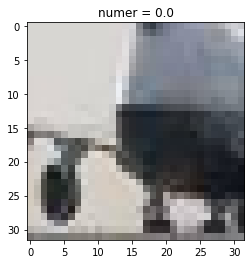

In [17]:
number=np.random.randint(0,10000)
#carro=1
#avion=0
plt.imshow(xtrain[number])
plt.title('numer = '+ str(ytrain[number]))
plt.show()

In [18]:
model= Sequential()

#se añade la primera capa
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))#regularización

#Se añade la segunda capa
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))#regularización

#Se añade la tercera capa
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))#regularización

#Se hace faltten para  usar la red  fully connected

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))#regularización

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))#regularización

#Añadimos una capa sofmaxt para que podamos clasificar imagenes
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

##loss <- funcion de perdida
#keras.losses.categorical_crossentropy<-calsificacion multiclase
#keras.losses.binary_crossentropy<-clasificacion binaria
#keras.losses.mean_squared_error<-regresion

In [19]:
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=30,verbose=1,validation_data=(xtest,ytest))

Epoch 1/30
313/313 [==============================] - 60s 187ms/step - loss: 0.9191 - accuracy: 0.6694 - val_loss: 0.5218 - val_accuracy: 0.7550
Epoch 2/30
313/313 [==============================] - 58s 186ms/step - loss: 0.4421 - accuracy: 0.8031 - val_loss: 0.3630 - val_accuracy: 0.8595
Epoch 3/30
313/313 [==============================] - 58s 185ms/step - loss: 0.3983 - accuracy: 0.8271 - val_loss: 0.2805 - val_accuracy: 0.8760
Epoch 4/30
313/313 [==============================] - 57s 184ms/step - loss: 0.3308 - accuracy: 0.8657 - val_loss: 0.2472 - val_accuracy: 0.9050
Epoch 5/30
313/313 [==============================] - 57s 184ms/step - loss: 0.2780 - accuracy: 0.8900 - val_loss: 0.2045 - val_accuracy: 0.9225
Epoch 6/30
313/313 [==============================] - 57s 184ms/step - loss: 0.2546 - accuracy: 0.9015 - val_loss: 0.2143 - val_accuracy: 0.9205
Epoch 7/30
313/313 [==============================] - 58s 184ms/step - loss: 0.2163 - accuracy: 0.9174 - val_loss: 0.1673 - val_ac

Text(0.5, 0, 'epoch')

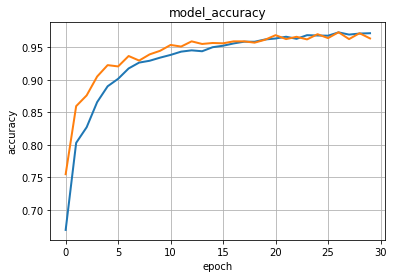

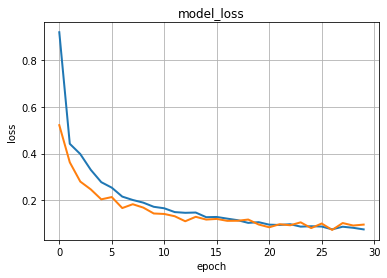

In [20]:
#total de aciertos
plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

#total de perdida
plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [21]:
ypred=model.predict(xtest);
ypred=ypred.ravel()>0.5

#metricas
print('Metricas: \n', metrics.classification_report(ytest,ypred))

#matriz de confusión
print('Matriz de confusión: \n',metrics.confusion_matrix(ytest,ypred))

Metricas: 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      1000
         1.0       0.98      0.95      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Matriz de confusión: 
 [[977  23]
 [ 50 950]]


In [22]:
model.save('CNN_Model_CIFAR10.h5')

In [23]:
model=keras.models.load_model('CNN_Model_CIFAR10.h5')

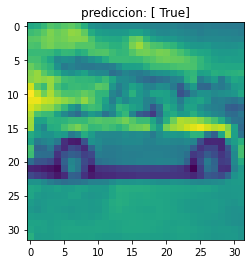

In [35]:
patron= xtest[np.random.randint(0,2000)].reshape(1,32,32,3)

number=model.predict(patron);
number=number.ravel()>0.5


plt.imshow(patron[0,:,:,0])
plt.title('prediccion: ' +str(number))
plt.show()

#falso=false =perro=avion
#verdadero=true=gato=carro

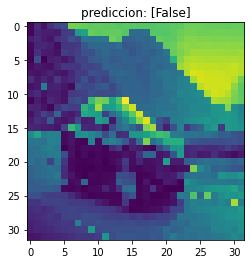

In [41]:
import cv2

img=cv2.imread('4c.jpg')

img=cv2.resize(img,(32,32))

patron= img.reshape(1,32,32,3)/255

number=model.predict(patron);
number=number.ravel()>0.5


plt.imshow(patron[0,:,:,0])
plt.title('prediccion: ' +str(number))
plt.show()
#falso=false =perro=dog=aviones
#verdadero=true=gato=cat=carros